In [1]:
import pandas as pd
import numpy as np
import sys
import multiprocessing
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch

# extra imports
from collections import OrderedDict
from itertools import zip_longest
import datetime as dt
from datetime import timedelta

import glob
import fathon
from fathon import fathonUtils as fu


import matplotlib as mpl
from multiprocessing import Pool, freeze_support, Manager

import itertools
colormap = plt.cm.RdBu
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle.mplstyle'))
from collections import defaultdict
# import freqopttest.kernel as kernel

In [2]:
def linRangeByStep(start, end, step=1):
    """Array of linearly separated elements.
    
    Parameters
    ----------
    start : int
        Smallest element.
    end : int
        Biggest element.
    step : int
        Step between two consecutive elements (default : 1).
    Returns
    -------
    numpy ndarray
        Array of linearly separated elements.
    """
    return np.arange(start, end + 1, step, dtype=np.int64)

def linRangeByCount(start, end, count=-1):
    """Array of linearly separated elements.
    
    Parameters
    ----------
    start : int
        Smallest element.
    end : int
        Biggest element.
    count : int
        Number of elements (default : `end` - `start` + 1).
    Returns
    -------
    numpy ndarray
        Array of linearly separated elements.
    """
    if count == -1 or count > (end - start + 1):
        count = end - start + 1
        
    return np.linspace(start, end, count, endpoint=True, dtype=np.int64)

In [3]:
import os
os.listdir('/home/ak/.config/matplotlib/')

['latexstyle.mplstyle']

In [4]:
t71 = '/media/ak/T7/August11th2022Experiments/'
expInputFiles = os.path.join(t71,'ExperimentInputFiles' )
expOne = os.path.join(t71, 'ExperimentOne')
figuresDestination = '/home/ak/Documents/Research/Papers/StylisedFactsPaper/figures/'
#n: Array of window's sizes used for the computation.
n =[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]

In [5]:
symbols = ['FB1', 'JB1', 'XM1', 'TY1', 'TU1', 'RX1', 'YM1', 'US1', 'DU1']
#dollar-->YM1, US1 has not the right data
#tick -->
symbol = 'YM1'
symbol_path = os.path.join(expOne,str(symbol))
## bar
bar = 'tick'
bar_mfdfa_files =sorted([f for f in os.listdir(symbol_path) if str(bar) in f])
len(bar_mfdfa_files) # this is the number of files that have symbol and bar!

146

In [6]:
# idx = 20
# tickIdxMfdfaFileLoc = os.path.join(symbol_path, bar_mfdfa_files[idx]) # location of dictionary
# # dictionary has the following keys:

# dictf = pd.read_pickle(tickIdxMfdfaFileLoc)
# dictf.keys()

In [7]:
#     Parameters
#     ----------
#     n : numpy ndarray
#         Array of window's sizes used for the computation.
#     tsVec : iterable
#         Time series used for the analysis.
#     F : numpy ndarray
#         Array containing the values of the fluctuations in each window.
#     listH : numpy ndarray
#         Array containing the values of the slope of the fit at each q-order.
#     qList : numpy ndarray
#         Array containing the values of the q-orders.

In [8]:
micro_variables = ['arrival_rates', 'gk_vol', 'median_traded_volume', 'micro_price_change'] # all the micro variables

gk_vol_dict = defaultdict(dict) # vol dictionary

#mfdfa details for the data above
arrival_rates_dict = defaultdict(dict)

median_traded_volume_dict = defaultdict(dict)
micro_price_change_dict = defaultdict(dict)

mfdfa_dict = defaultdict(dict)

tau_dict = defaultdict(dict)

alpha_dict = defaultdict(dict)

mfSpect_dict = defaultdict(dict)

list_H_intercept_dict = defaultdict(dict)

list_H_dict = defaultdict(dict)

n_F_dict = defaultdict(dict)


for idx in range(0, len(bar_mfdfa_files)):
    
    barIdxMfdfaFileLoc = os.path.join(symbol_path, bar_mfdfa_files[idx]) # location of file for symbol/bar combination
    pkl_dict = pd.read_pickle(barIdxMfdfaFileLoc) # read the pickle file
    pkl_dict_keys = sorted(list(pkl_dict.keys())) # get out all the keys- but its really bars
    
    bar = list(set(pkl_dict_keys).difference(set(micro_variables)))[0] # get out the bar-choice
     
    gk_vol_dict[idx][bar] = pkl_dict['gk_vol'] # get the vol
    median_traded_volume_dict[idx][bar] = pkl_dict['median_traded_volume'] #get the volume
    arrival_rates_dict[idx][bar] = pkl_dict['arrival_rates'] #get arrival rates
    micro_price_change_dict[idx][bar] = pkl_dict['micro_price_change'] # get micro price change
    #---- start getting all the mfdfa variables ----#
    tau_dict[idx][bar] = pkl_dict[str(bar)]['tau'] # tau
    alpha_dict[idx][bar] = pkl_dict[str(bar)]['alpha'] # alpha
    mfSpect_dict[idx][bar] = pkl_dict[str(bar)]['mfSpect'] # mfSpect
    n_F_dict[idx][bar] = pkl_dict[str(bar)]['n_F'] # n_F
    list_H_dict[idx][bar] = pkl_dict[str(bar)]['list_H'] # list_H
    list_H_intercept_dict[idx][bar] = pkl_dict[str(bar)]['list_H_intercept'] # intercept
    n_F_dict[idx][bar] = pkl_dict[str(bar)]['n_F'] #n,F
    
    
    
    
    
                       
    


In [9]:
# micro_price_change_dict

In [10]:
name='dollar'
d =micro_price_change_dict # just define a variable based on one dictionary
g = gk_vol_dict



In [11]:
# get all second level keys of all first level keys together (set comprehension)
sorted(list({k2 for v in d.values() for k2 in v}))

['dollar', 'tick', 'volume']

In [12]:
# get all first level keys

#list(d.keys())

In [13]:
# get all possible pairs of  (first, second) keys
tick_all_indices=[(k1,k2) for (k1, v) in d.items() for k2 in v if k2=='tick' ]
volume_all_indices=[(k1) for (k1, v) in d.items() for k2 in v if k2=='volume' ]
dollar_all_indices=[(k1) for (k1, v) in d.items() for k2 in v if k2=='dollar' ]
len(volume_all_indices) + len(dollar_all_indices) +len(tick_all_indices) # should equal total!

146

In [14]:
# tick_all_indices
# dollar_all_indices
# tick_all_indices

In [15]:
# sorted(list({k2 for v in d.values() for k2 in v}))

In [16]:

micro_price_change = dict()
mfSpect_bar_choice = dict()
alpha_bar_choice = dict()
gk_vol = dict()
n_F_bar_choice =dict()
tau_bar_choice = dict()
list_H_intercept_bar_choice = dict()
list_H_bar_choice = dict()
median_traded_volume_choice = dict()
arrival_rates_choice = dict()

for f in dollar_all_indices: #picking one index!
    
    micro_price_change[f] = d[f][str(bar)]
    mfSpect_bar_choice[f] = mfSpect_dict[f][str(bar)] 
    alpha_bar_choice[f] = alpha_dict[f][str(bar)] 
    n_F_bar = n_F_dict[f][str(bar)]
    gk_vol[f] = gk_vol_dict[f][str(bar)]
    tau_bar_choice[f] = tau_dict[f][str(bar)]
    list_H_intercept_bar_choice[f] = list_H_intercept_dict[f][str(bar)]
    list_H_bar_choice[f] = list_H_dict[f][str(bar)]
    arrival_rates_choice[f] = arrival_rates_dict[f][str(bar)]
    median_traded_volume_choice[f] =median_traded_volume_dict[f][str(bar)]    

In [17]:
print(set(micro_price_change.keys()) == set(alpha_bar_choice.keys()))
print(set(micro_price_change.keys()) == set(list_H_bar_choice.keys()))

mpc_keys = list(micro_price_change.keys())


True
True


In [18]:
pd.DataFrame.from_dict(gk_vol).median(axis=1).describe()

count    3.319240e+05
mean     2.401036e-09
std      8.679750e-08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.060986e-06
dtype: float64

In [19]:
mpc_df =pd.DataFrame.from_dict(micro_price_change).fillna(0)
mpc_df.shape

(331924, 79)

In [20]:
mfSpect_bar_choice.keys()

dict_keys([0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 16, 17, 18, 19, 23, 24, 25, 26, 27, 28, 36, 37, 38, 45, 49, 50, 51, 52, 53, 54, 55, 57, 60, 61, 62, 66, 69, 70, 72, 73, 74, 75, 76, 77, 78, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 102, 103, 104, 111, 119, 120, 121, 125, 126, 127, 132, 133, 134, 138, 139, 140, 141, 142, 143, 144, 145])

In [21]:
std_df =pd.DataFrame()


In [22]:
std= mpc_df.std(axis=0)
std_df['std'] = std
first_regime = np.quantile(std, 0.33) # thresholds based on the definition of a median
second_regime = np.quantile(std, 0.66)

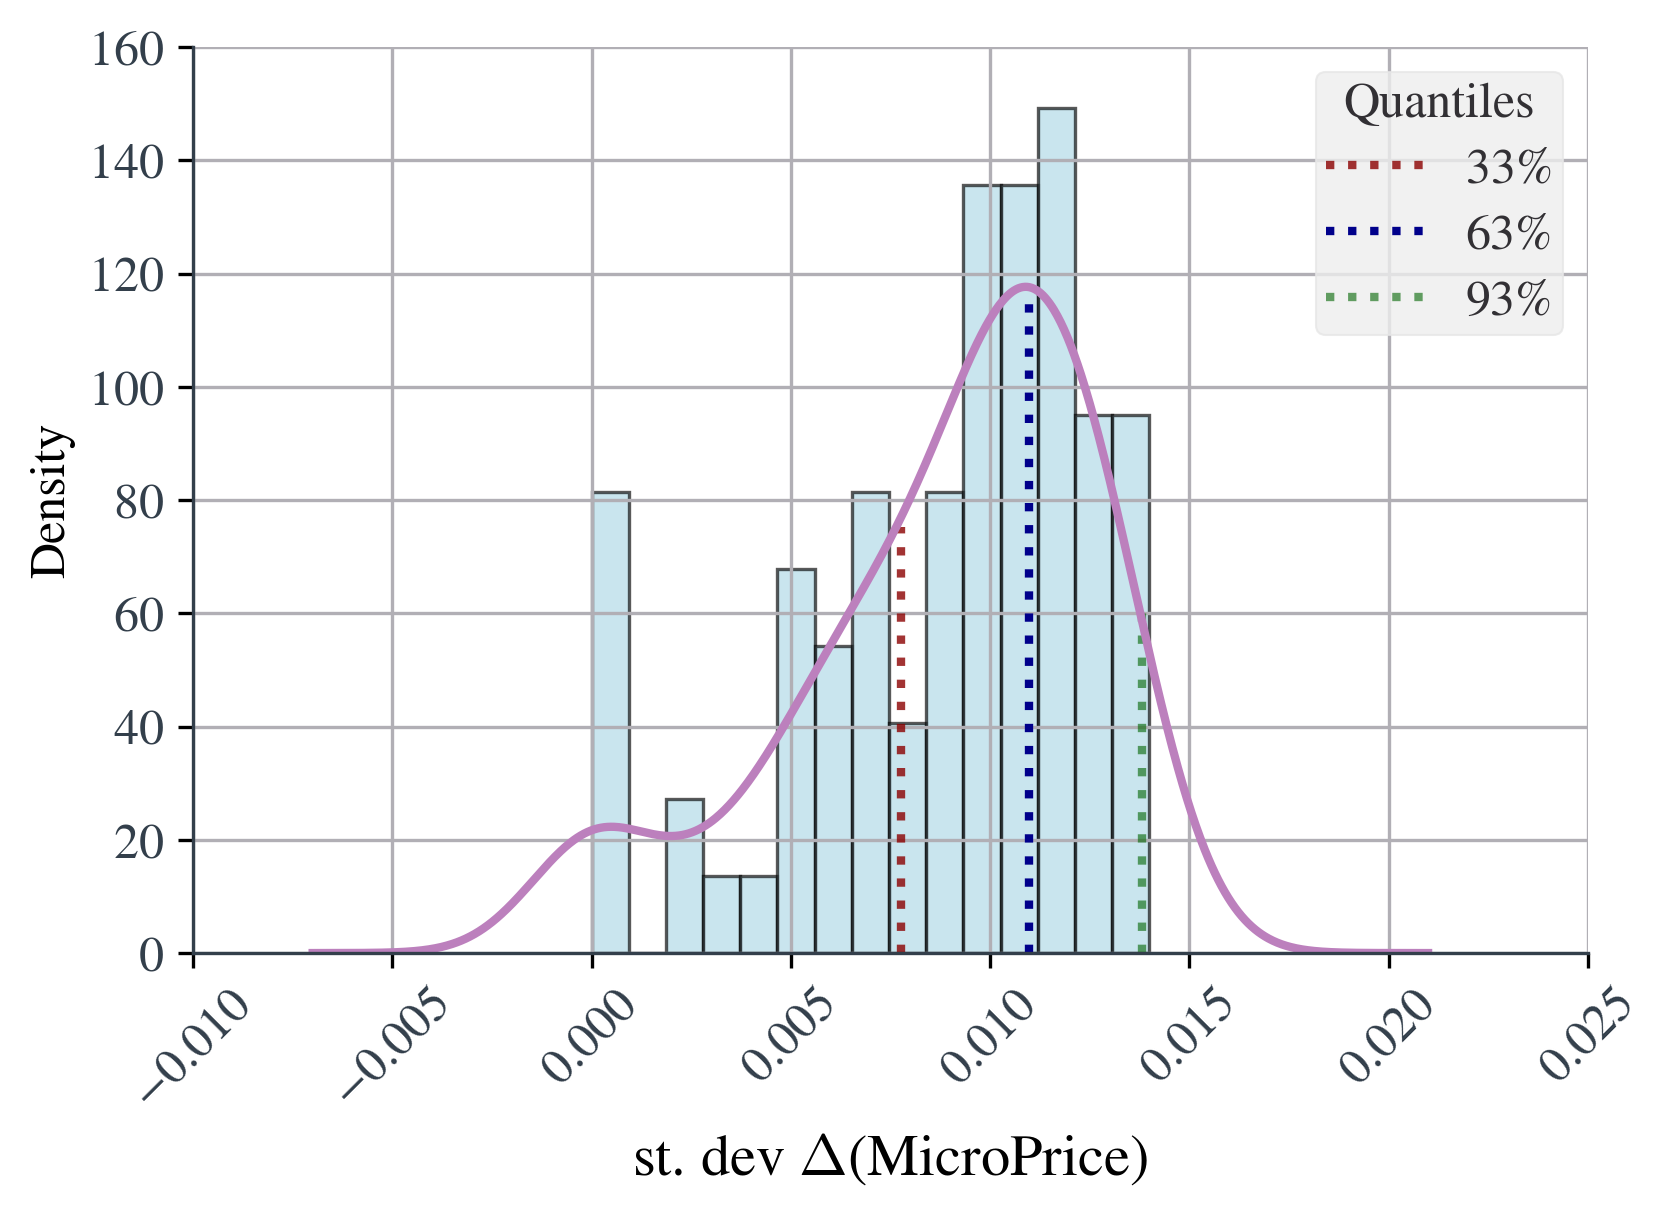

In [23]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'

fig, ax = plt.subplots(figsize = (6,4))

# Plots #
    # Plot histogram
_=std.plot(kind = "hist", density = True, bins = 15, color='lightblue', alpha=0.65, label="") # change density to true, because KDE uses density
    # Plot KDE
# _=std.plot(kind = "kde", color='darkred')
    
# Calculate percentiles
quant_5, quant_33, quant_66, quant_99 = std.quantile(0.05), std.quantile(0.33), std.quantile(0.66), std.quantile(0.99)

# [quantile, opacity, length]
quants = [ [quant_33, 0.8, 0.47, 'darkred', '33%'], [quant_66, 1, 0.73, 'darkblue','63%'], [quant_99, 0.6, 0.39, 'darkgreen','93%']]
labels = ['33%', '66%', '99%']
#[quant_5, 0.6, 0.13],
# Plot the lines with a loop
for i in quants:
    ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color =i[3], label = i[4])

plt.style.use("bmh")
# Later in the code
ax.grid(False)
_=std.plot(kind = "kde",label="")

ax.tick_params(axis='x', labelrotation = 45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
_=ax.set_xlabel('st. dev $\\Delta$(MicroPrice)', fontsize= 14)
_=plt.legend(title='Quantiles', fontsize=12)
file_name = str(symbol)+'_'+str(bar)+'_std_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name))


In [24]:
print(first_regime, second_regime)

0.007762186968310944 0.01097705350998804


In [25]:
#splitting into regimes!
std_df['LowRegime'] = std_df['std'].apply(lambda x: '1' if x <= first_regime else '0')
std_df['HiRegime'] = std_df['std'].apply(lambda x: '1' if x >= second_regime else '0')
std_df['MidRegime'] = std_df['std'].apply(lambda x: '1' if first_regime<x < second_regime else '0')




In [26]:
std_df

,std,LowRegime,HiRegime,MidRegime
0,0.012871,0,1,0
1,0.004909,1,0,0
2,0.010120,0,0,1
4,0.012025,0,1,0
5,0.005489,1,0,0
...,...,...,...,...
141,0.000000,1,0,0
142,0.000000,1,0,0
143,0.000000,1,0,0
144,0.000000,1,0,0


In [27]:
std_df
low_regime_indices = std_df.index[std_df['LowRegime'] == '1'].tolist()
hi_regime_indices = std_df.index[std_df['HiRegime'] == '1'].tolist()
mid_regime_indices = std_df.index[std_df['MidRegime'] == '1'].tolist()

In [28]:
len(hi_regime_indices)+len(low_regime_indices)+len(mid_regime_indices) 

# these are all dates, so this should match to the shape of the mpc dataframe in terms of dates!

79

In [29]:
tau_bar_choice_df =pd.DataFrame.from_dict(tau_bar_choice).fillna(0)

In [30]:
mid_regime_indices

[2,
 9,
 16,
 19,
 23,
 24,
 37,
 38,
 51,
 61,
 62,
 72,
 76,
 78,
 82,
 83,
 89,
 90,
 91,
 95,
 102,
 103,
 125,
 126,
 134,
 138]

## tau ##

In [31]:
low_regime_tau = pd.DataFrame.from_dict({k:tau_bar_choice[k] for k in low_regime_indices})
hi_regime_tau = pd.DataFrame.from_dict({k:tau_bar_choice[k] for k in hi_regime_indices})
mid_regime_tau = pd.DataFrame.from_dict({k:tau_bar_choice[k] for k in mid_regime_indices})



In [32]:
len(low_regime_tau)

70

In [33]:
lbar=low_regime_tau.median(axis=0).mean()
mbar = mid_regime_tau.median(axis=0).mean()
hbar =hi_regime_tau.median(axis=0).mean()

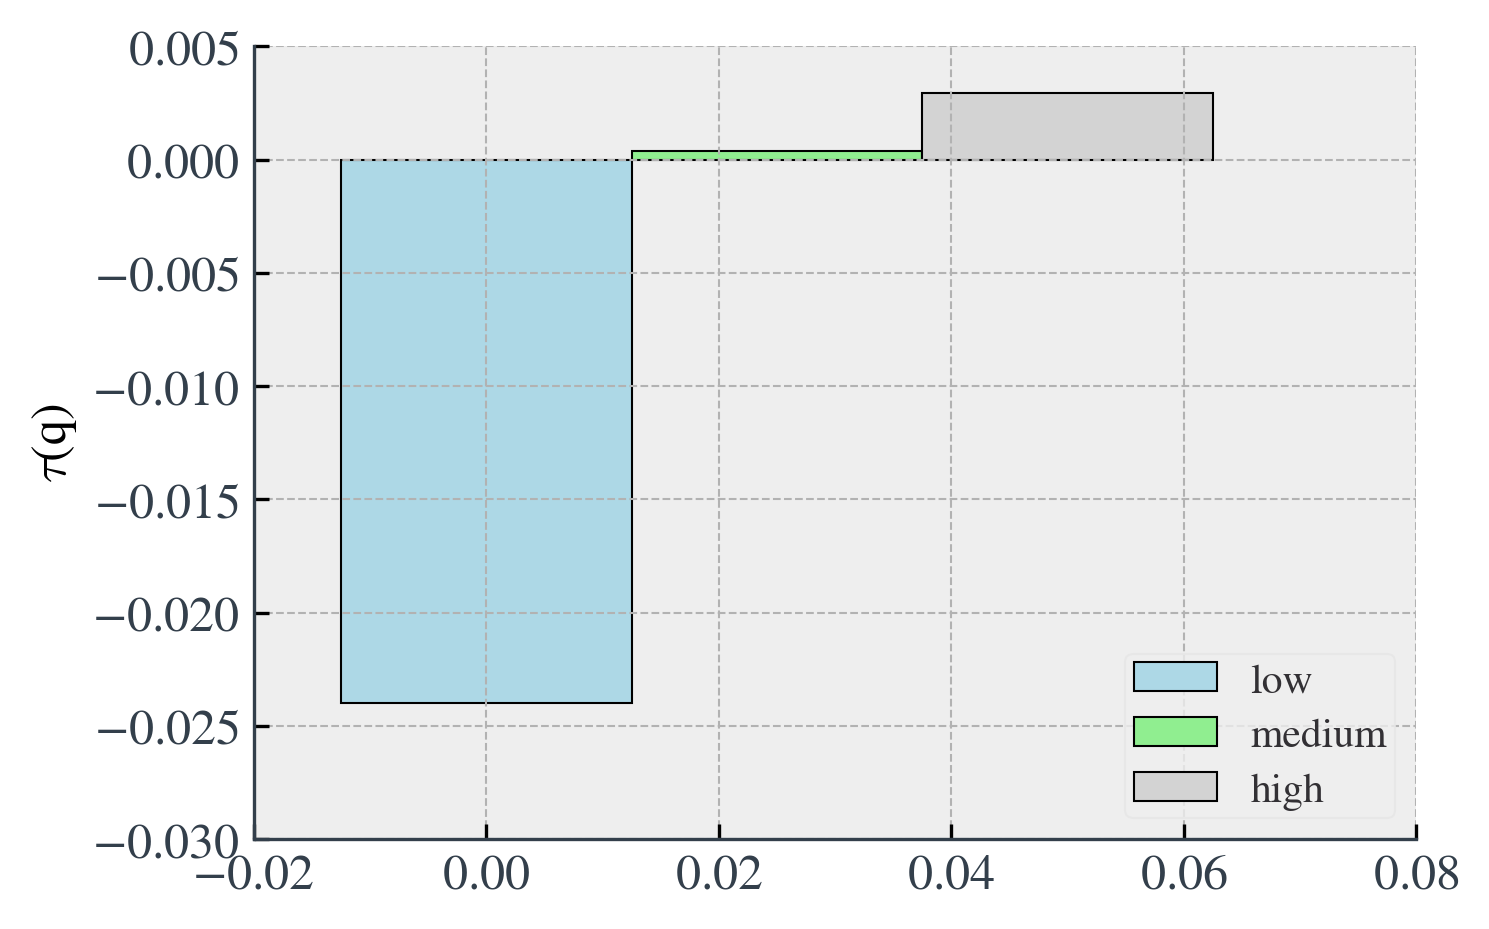

In [34]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
fig, ax = plt.subplots(figsize=(5,3.5))
n=1
r = np.arange(n)
width = 0.025

plt.bar(r, lbar, color = 'lightblue',
        width = width, edgecolor = 'black',
        label='low')
plt.bar(r + width, mbar, color = 'lightgreen',
        width = width, edgecolor = 'black',
        label='medium')
plt.bar(r + 2*width, hbar, color = 'lightgrey',
        width = width, edgecolor = 'black',
        label='high')

plt.ylabel('$\\tau$(q)')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
file_name = str(symbol)+'_'+str(bar)+'_tau_barplots.png'
plt.savefig(os.path.join(figuresDestination,file_name))
plt.show()

In [35]:
##need the qs so i am able to plot !

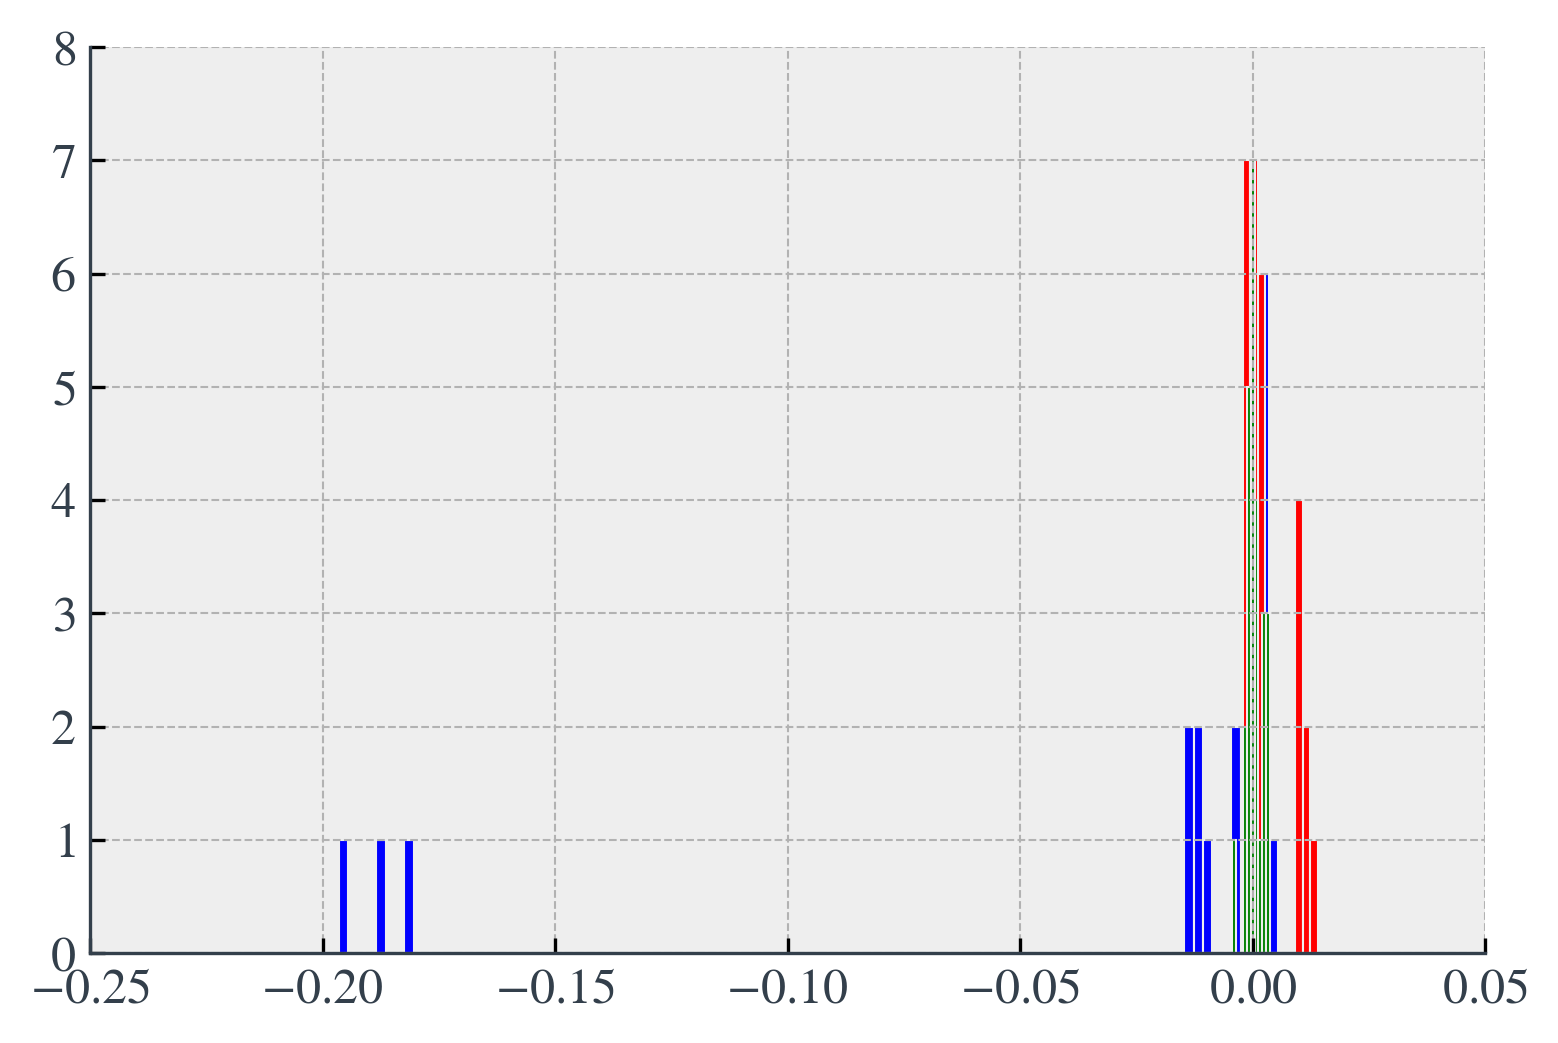

In [36]:
_=plt.hist(low_regime_tau.median(axis=0), color ='blue', bins =100)
_=plt.hist(hi_regime_tau.median(axis=0), color ='red')
_=plt.hist(mid_regime_tau.median(axis=0), color ='green')


In [37]:
qs = np.arange(-3, 4, 0.1)

In [38]:
len(qs)

70

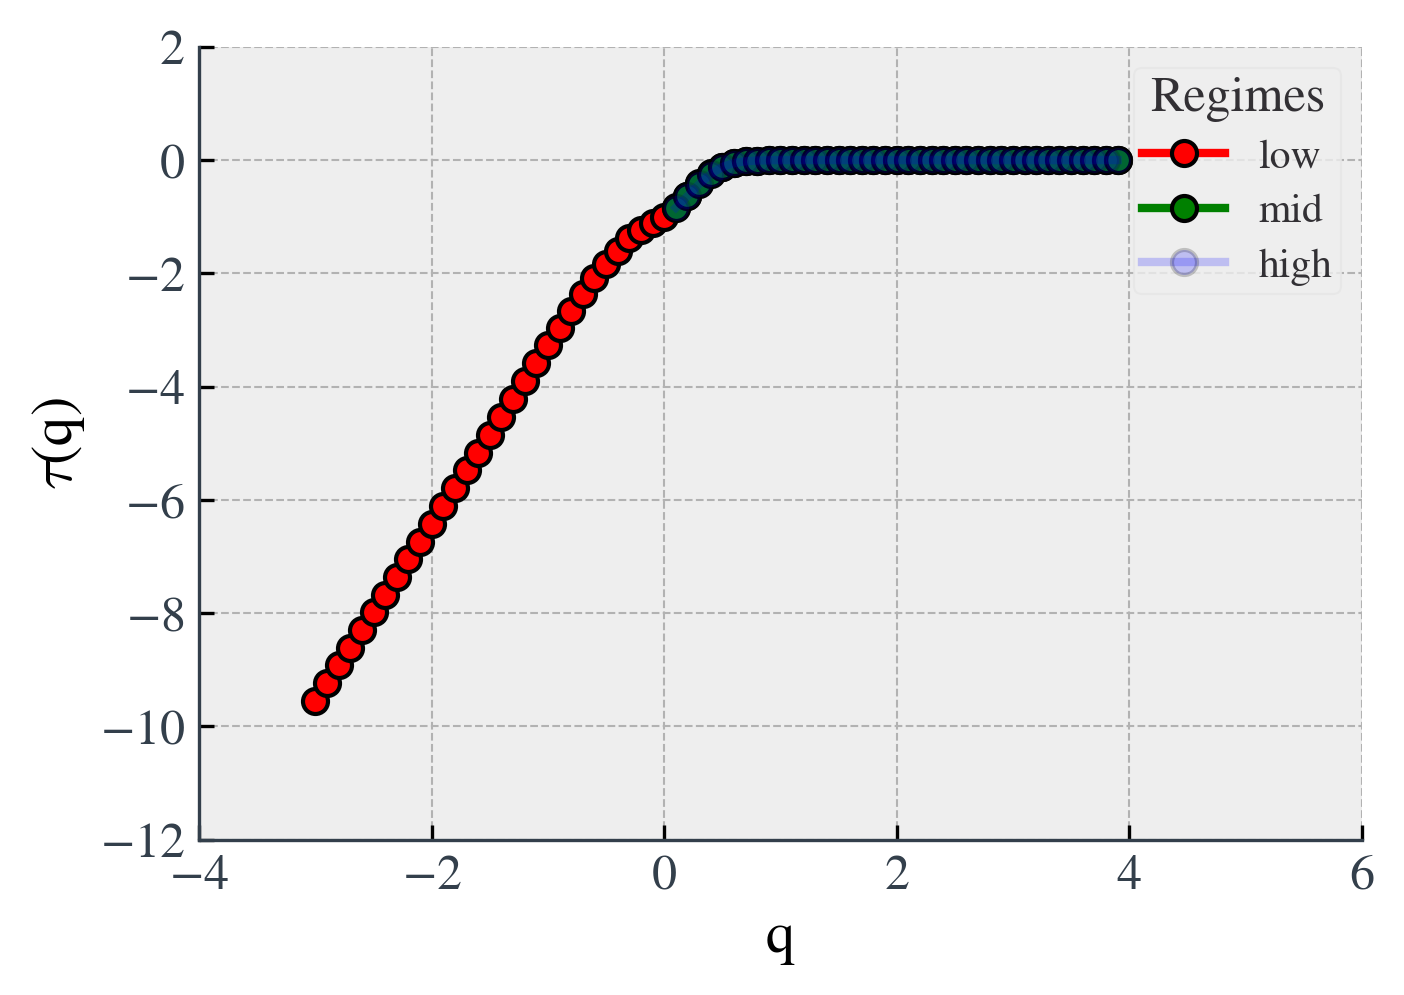

In [39]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
fig, ax = plt.subplots(figsize=(5,3.5))
ax.spines['top'].set_visible(False)
plt.plot(qs, low_regime_tau.median(axis=1), 'ro-', label ='low')
plt.plot(qs, mid_regime_tau.median(axis=1), 'go-', label = 'mid')
plt.plot(qs, hi_regime_tau.median(axis=1), 'bo-',alpha =0.2, label='high')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('$\\tau$(q)', fontsize=14)
plt.legend(title='Regimes')
file_name = str(symbol)+'_'+str(bar)+'_tauq_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name))

## arrival rates

In [40]:
low_regime_arrivals = pd.DataFrame.from_dict({k:arrival_rates_choice[k] for k in low_regime_indices})
hi_regime_arrivals = pd.DataFrame.from_dict({k:arrival_rates_choice[k] for k in hi_regime_indices})
mid_regime_arrivals = pd.DataFrame.from_dict({k:arrival_rates_choice[k] for k in mid_regime_indices})



In [41]:
lbar_arrivals=low_regime_arrivals.median(axis=1).mean()
mbar_arrivals = mid_regime_arrivals.median(axis=1).mean()
hbar_arrivals =hi_regime_arrivals.median(axis=1).mean()

In [42]:

mid_regime_arrivals.median(axis=1).mean()

1.0600481947878488

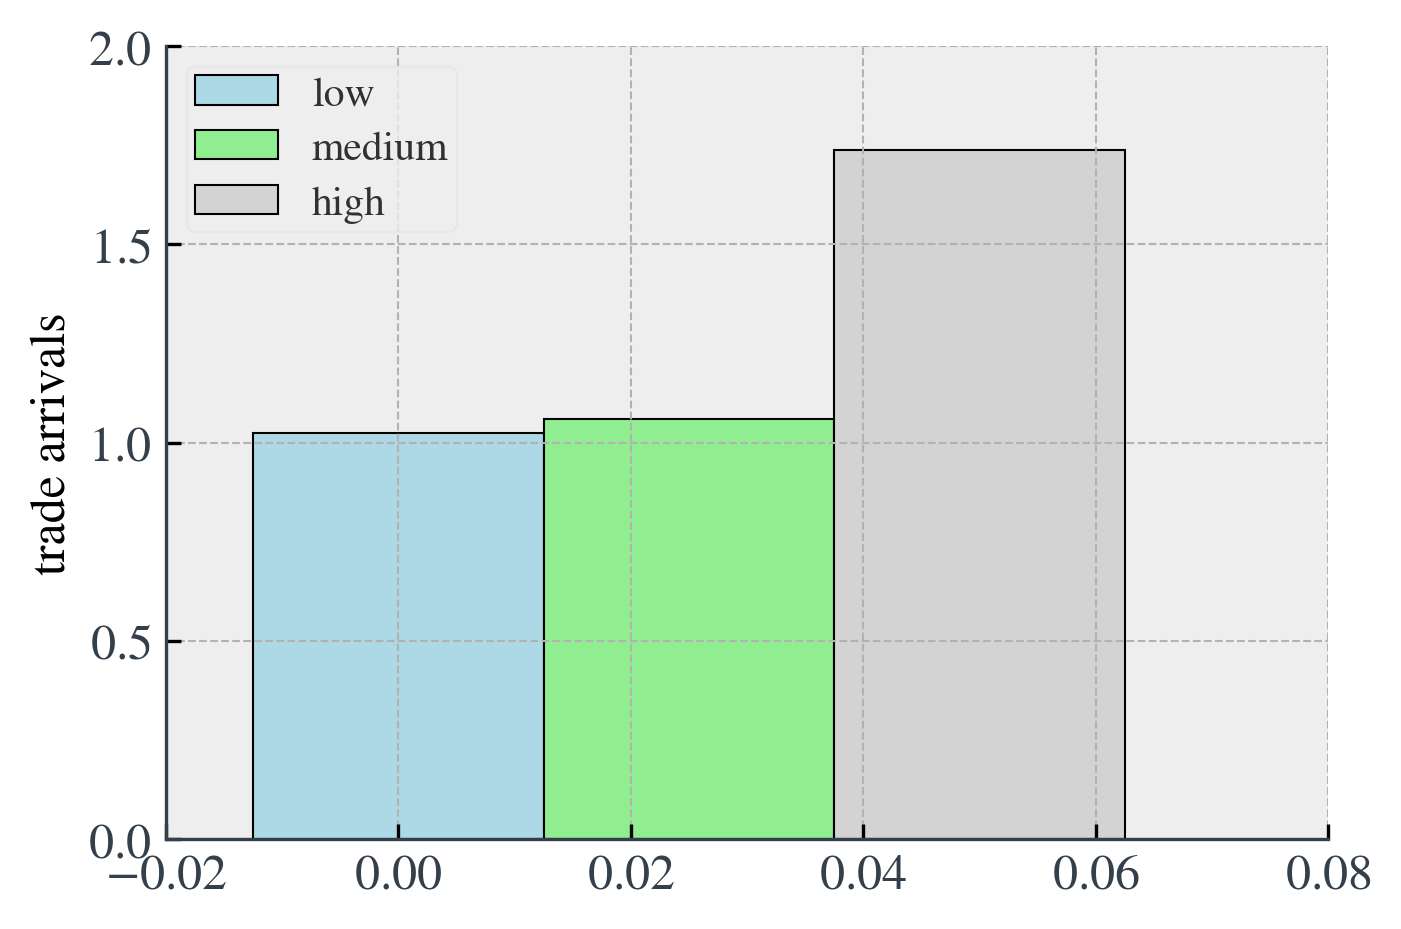

In [43]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
fig, ax = plt.subplots(figsize=(5,3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
n=1
r = np.arange(n)
width = 0.025

plt.bar(r, lbar_arrivals, color = 'lightblue',
        width = width, edgecolor = 'black',
        label='low')
plt.bar(r + width, mbar_arrivals, color = 'lightgreen',
        width = width, edgecolor = 'black',
        label='medium')
plt.bar(r + 2*width, hbar_arrivals, color = 'lightgrey',
        width = width, edgecolor = 'black',
        label='high')
plt.ylabel('trade arrivals')

plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
file_name = str(symbol)+'_'+str(bar)+'_trade_arrivals_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name))
plt.show()

## volume

In [44]:
low_regime_median_traded_volume = pd.DataFrame.from_dict({k:median_traded_volume_choice[k] for k in low_regime_indices})
hi_regime_median_traded_volume = pd.DataFrame.from_dict({k:median_traded_volume_choice[k] for k in hi_regime_indices})
mid_regime_median_traded_volume = pd.DataFrame.from_dict({k:median_traded_volume_choice[k] for k in mid_regime_indices})



In [45]:
low_regime_median_traded_volume.median(axis=1).mean()
hi_regime_median_traded_volume.median(axis=1).mean()
mid_regime_median_traded_volume.median(axis=1).mean()


14.488703692725098

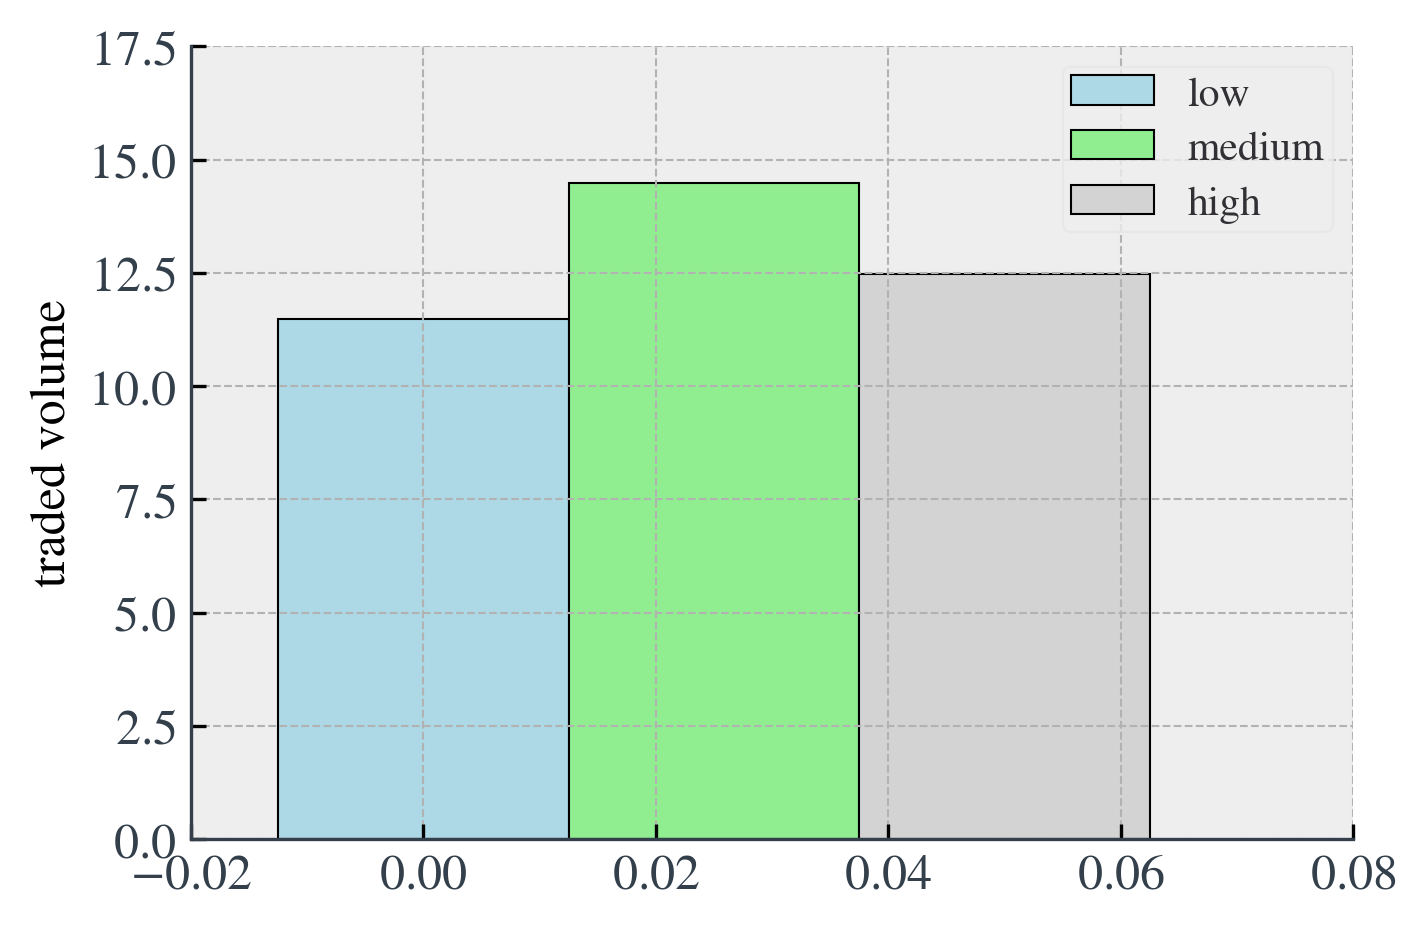

In [46]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
fig, ax = plt.subplots(figsize=(5,3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

n=1
r = np.arange(n)
width = 0.025

plt.bar(r, low_regime_median_traded_volume.median(axis=1).mean(), color = 'lightblue',
        width = width, edgecolor = 'black',
        label='low')
plt.bar(r + width, mid_regime_median_traded_volume.median(axis=1).mean(), color = 'lightgreen',
        width = width, edgecolor = 'black',
        label='medium')
plt.bar(r + 2*width, hi_regime_median_traded_volume.median(axis=1).mean(), color = 'lightgrey',
        width = width, edgecolor = 'black',
        label='high')

plt.ylabel('traded volume')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
file_name = str(symbol)+'_'+str(bar)+'_traded_volumes_regimes.png'
plt.savefig(os.path.join(figuresDestination,file_name))
plt.legend()
plt.show()

In [47]:
## now do the two sample tests

In [48]:
## now do the DCCA analysis between the variables (median volume/arrival rates for each of the regimes!)

In [49]:
a= low_regime_median_traded_volume.median(axis=1)
b = low_regime_arrivals.median(axis=1)
a = fu.toAggregated(a)
b = fu.toAggregated(b)

In [50]:
winSizes = fu.linRangeByStep(20, 1000, step=50)
polOrd = 1

In [51]:
pydcca = fathon.DCCA(a, b)

In [52]:
n, F = pydcca.computeFlucVec(winSizes, polOrd=polOrd)

In [53]:
H, H_intercept = pydcca.fitFlucVec()

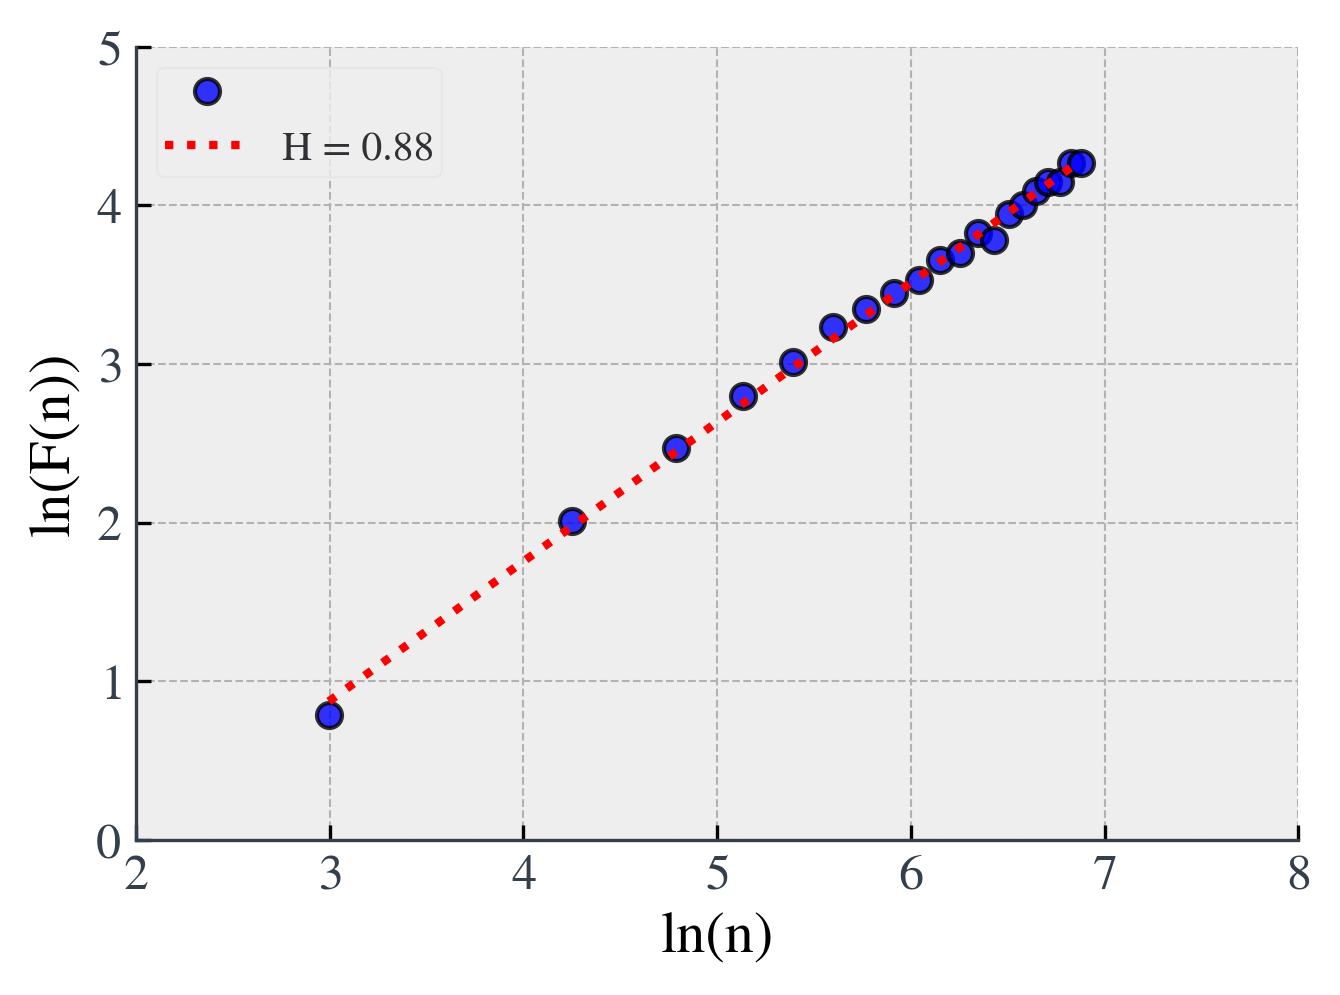

In [54]:
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
fig, ax = plt.subplots(figsize=(5,3.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(np.log(n), np.log(F), 'bo',alpha=0.8, label =" ")
plt.plot(np.log(n), H_intercept+H*np.log(n), 'k:',color='r' ,label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc=0, fontsize=10)

file_name = str(symbol)+'_'+str(bar)+'_lnFn_n.png'
_=plt.savefig(os.path.join(figuresDestination,file_name))

_=plt.show()

In [65]:
limits_list = np.array([[20,120], [220,870]], dtype=int)
list_H, list_H_intercept = pydcca.multiFitFlucVec(limits_list)

ValueError: x and y must have same first dimension, but have shapes (97,) and (20,)

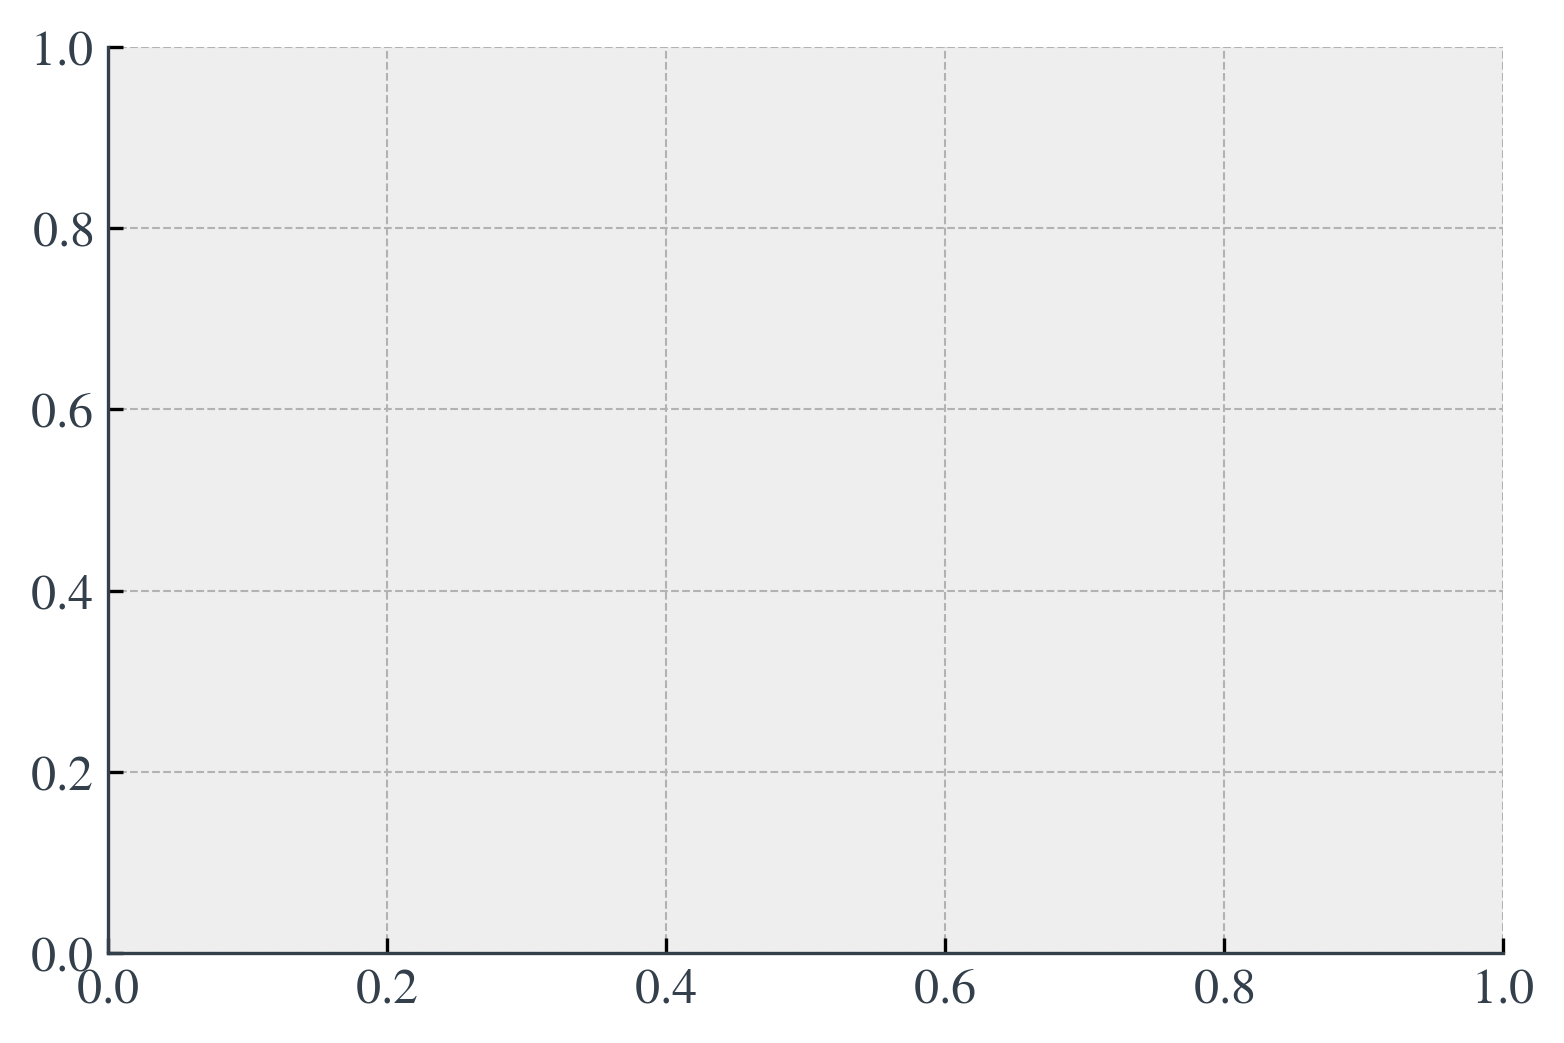

In [67]:
clrs = ['k', 'b', 'm', 'c', 'y']
stls = ['-', '--', '.-']
plt.plot(np.log(n), np.log(F),'ro')
for i in range(len(list_H)):
    n_rng = np.arange(limits_list[i][0], limits_list[i][1]+1, 50)
    plt.plot(np.log(n_rng), list_H_intercept[i]+list_H[i]*np.log(n_rng),
             clrs[i%len(clrs)]+stls[(i//len(clrs))%len(stls)], label='H = {:.2f}'.format(list_H[i]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.legend(loc=0, fontsize=10)

In [68]:
winSizes = fu.linRangeByStep(20, 1000, step=50)
polOrd = 1

In [58]:
%%time
n, rho = pydcca.computeRho(winSizes, polOrd=polOrd)

CPU times: user 4.62 s, sys: 65.5 ms, total: 4.68 s
Wall time: 302 ms


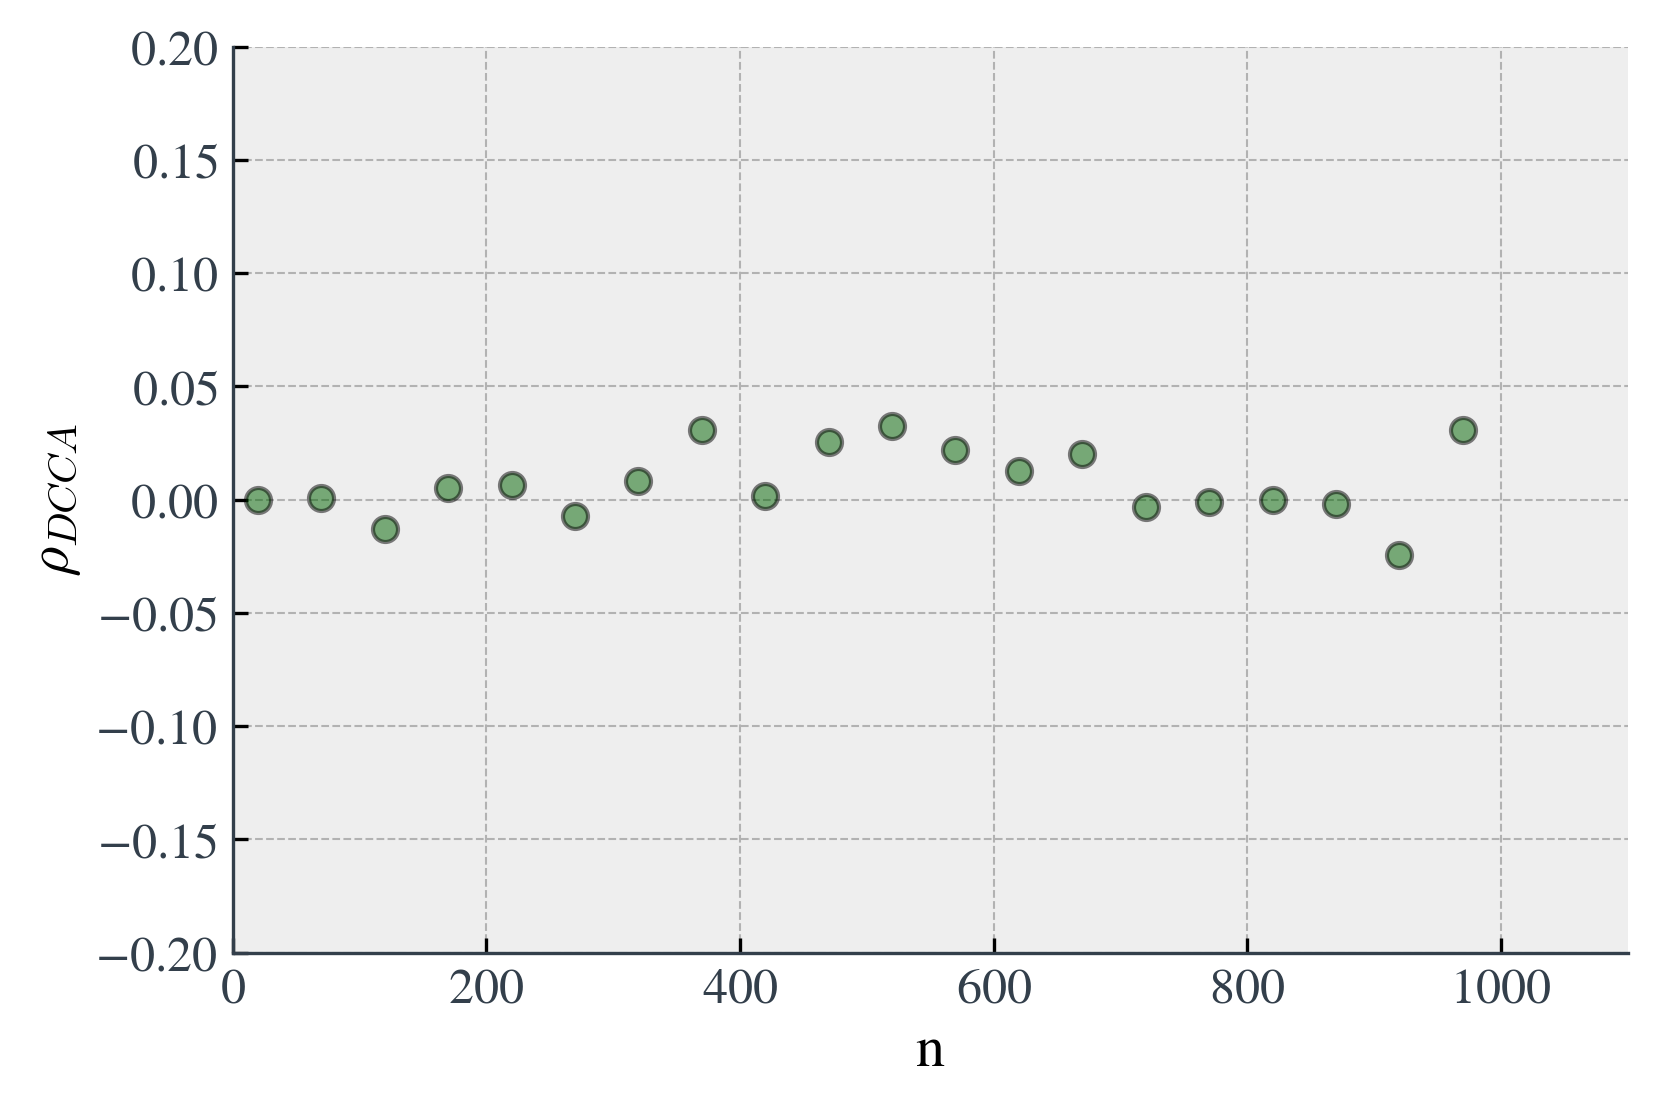

In [59]:
plt.plot(n, rho, 'ro', alpha =0.5, color='darkgreen')
plt.ylim(-1, 1)
plt.xlabel('n', fontsize=14)
plt.ylabel('$\\rho_{DCCA}$', fontsize=14)
# plt.title('rhoDCCA', fontsize=14)
_=plt.xlim(0, 1100)
_=plt.ylim(-0.2, 0.2)


In [60]:
pythresh = fathon.DCCA()

In [61]:
L = 300
winSizes = fu.linRangeByStep(4, 100, step=1)
nSim = 100
confLvl = 0.95
polOrd = 1

In [62]:
%%time
n, cInt1, cInt2 = pythresh.rhoThresholds(L, winSizes, nSim, confLvl, polOrd=polOrd, verbose=True)

Simulation number 1
Simulation number 2
Simulation number 3
Simulation number 4
Simulation number 5
Simulation number 6
Simulation number 7
Simulation number 8
Simulation number 9
Simulation number 10
Simulation number 11
Simulation number 12
Simulation number 13
Simulation number 14
Simulation number 15
Simulation number 16
Simulation number 17
Simulation number 18
Simulation number 19
Simulation number 20
Simulation number 21
Simulation number 22
Simulation number 23
Simulation number 24
Simulation number 25
Simulation number 26
Simulation number 27
Simulation number 28
Simulation number 29
Simulation number 30
Simulation number 31
Simulation number 32
Simulation number 33
Simulation number 34
Simulation number 35
Simulation number 36
Simulation number 37
Simulation number 38
Simulation number 39
Simulation number 40
Simulation number 41
Simulation number 42
Simulation number 43
Simulation number 44
Simulation number 45
Simulation number 46
Simulation number 47
Simulation number 48
S

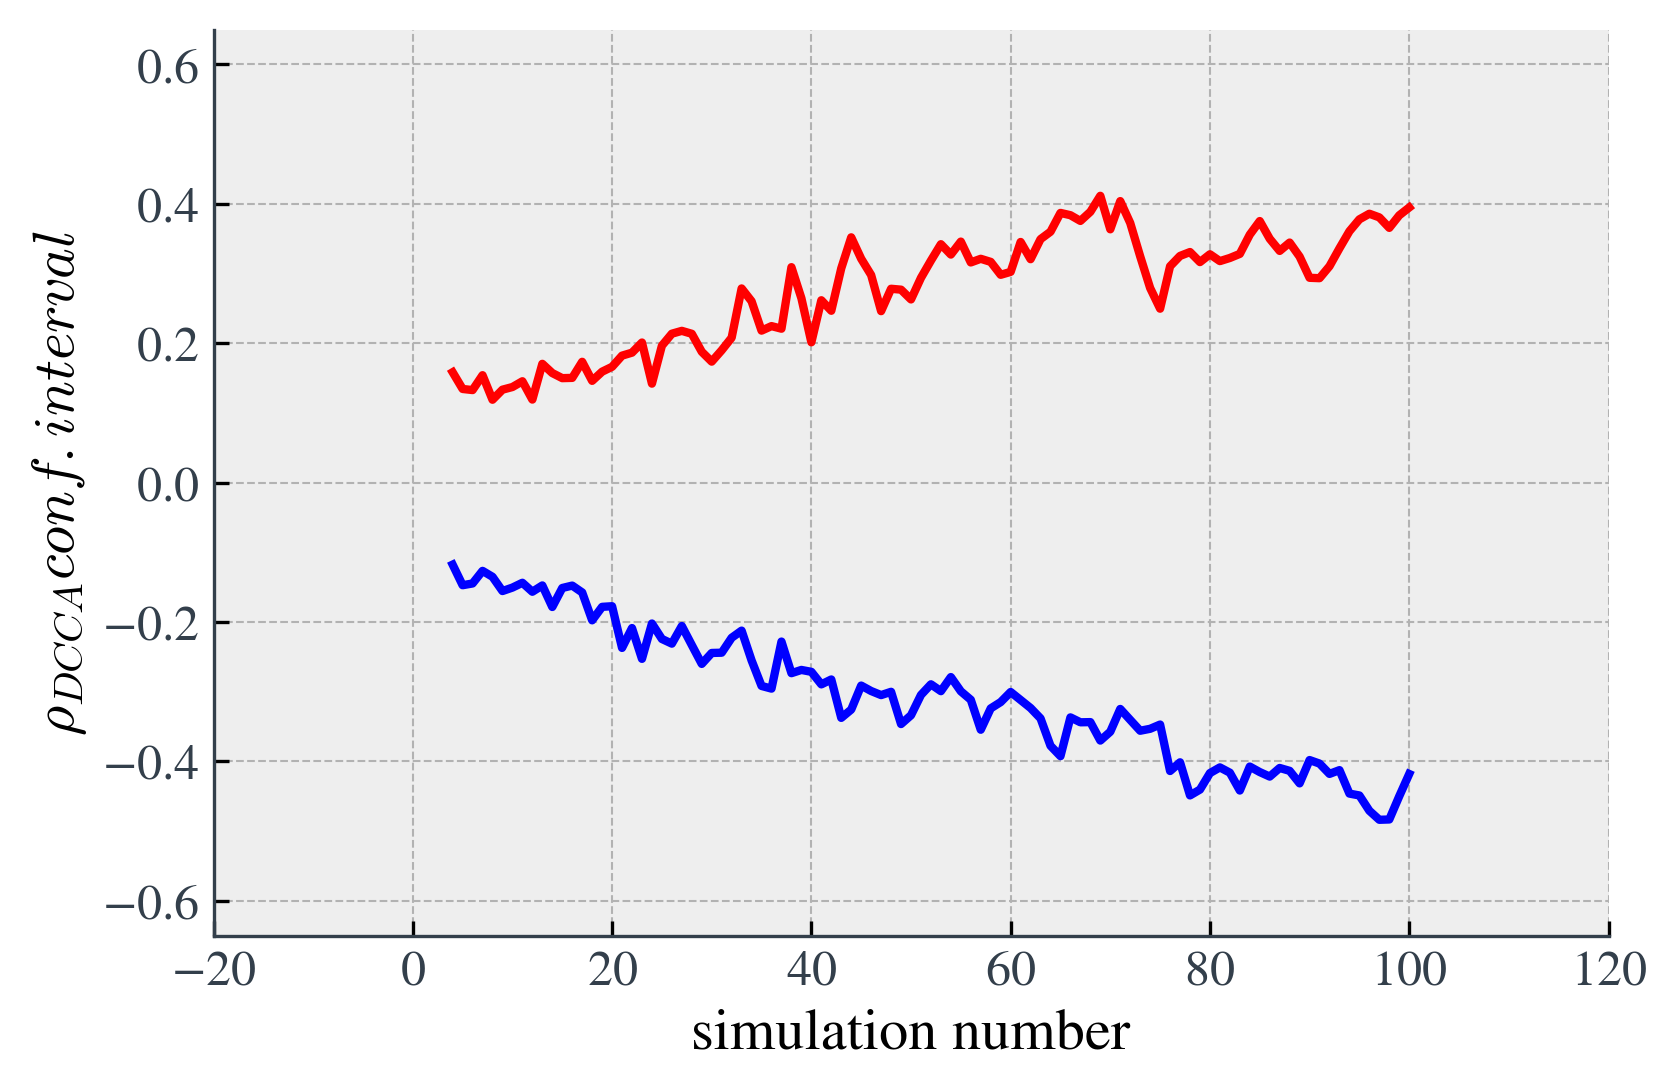

In [63]:
plt.plot(n, cInt1, 'r-')

plt.plot(n, cInt2, 'b-')

_=plt.ylabel('$\\rho_{DCCA}'+'  '+'conf.interval$', fontsize=14)
_=plt.ylim(-0.65, 0.65)

_=plt.xlabel('simulation number', fontsize=14)